#### COMP3602: Data Analysis and Visualization with Python, Spring 2024

# Project Part 1

Source URL of Dataset: [https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks](https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks)

**Group Members:**

- Abdulaziz Saud Al Jabri (134563)

- Mazin Humood Al Dhuhli (134362)


---

### Dataset Introduction:

*A short introduction describing the dataset field or area, it’s purpose and what you aim to learn from analyzing this dataset*

Cybersecurity attack datasets hold the key to understanding cyber threats. They provide valuable information for training security models to detect and prevent attacks, revealing insights into evolving attacker tactics and enabling researchers to benchmark security tools. By analyzing these datasets, researchers can answer crucial questions like the most prevalent attack types, how attack methods shift over time, and how effective machine learning models are in real-time attack identification. Ultimately, this exploration provides researchers ways to develop more robust defenses and stay ahead of the ever-changing threat landscape.

* Purpose:
    - Train security models (e.g., malware detection).
    - Understand attack patterns and trends.
    - Benchmark security tools.

---

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [120]:
data = pd.read_csv('cybersecurity_attacks.csv')
# data.head()

---
Show the number of rows/observations in the dataset

In [121]:
print("Number of observations:", data.shape[0])    

Number of observations: 40000


---
Show the **maximum** values for each attribute

In [122]:
print(data.max(numeric_only=True))

Source Port         65530.0
Destination Port    65535.0
Packet Length        1500.0
Anomaly Scores        100.0
dtype: float64


---
Show the **minimum** values for each attribute

In [123]:
print(data.min(numeric_only=True))

Source Port         1027.0
Destination Port    1024.0
Packet Length         64.0
Anomaly Scores         0.0
dtype: float64


---
Show the 25th, 50th and 75th percentile of the dataset

In [124]:
percentiles = data.quantile([0.25, 0.5, 0.75], numeric_only=True)
print(percentiles)

      Source Port  Destination Port  Packet Length  Anomaly Scores
0.25     16850.75          17094.75          420.0          25.150
0.50     32856.00          33004.50          782.0          50.345
0.75     48928.25          49287.00         1143.0          75.030


---
Show the number of missing values for each attribute

In [125]:
print(data.isnull().sum())

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64


---
Clean the data by removing any missing values from the dataset

In [126]:
data = data.dropna()
print(data.isnull().sum())

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64


---
Describing simple statistics for numerical attributes

In [127]:
print(data.describe())

        Source Port  Destination Port  Packet Length  Anomaly Scores
count   1237.000000       1237.000000    1237.000000     1237.000000
mean   33930.291027      33388.203719     784.832660       50.048593
std    18731.627558      18599.370814     419.686322       28.754095
min     1109.000000       1041.000000      64.000000        0.030000
25%    17763.000000      17240.000000     416.000000       26.970000
50%    35259.000000      33574.000000     791.000000       48.990000
75%    50057.000000      49881.000000    1159.000000       75.170000
max    65493.000000      65451.000000    1500.000000       99.980000


---
Plots to display frequency distribution of the attributes

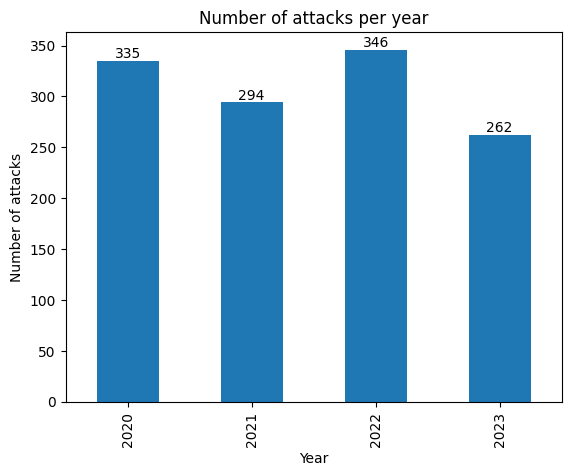

In [128]:
# Visualize the number of attacks per year using a bar chart
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Year'] = data['Timestamp'].dt.year
data['Year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Number of attacks per year')
for index, value in enumerate(data['Year'].value_counts().sort_index()):
    plt.text(index, value+3, str(value), ha='center')
plt.show()

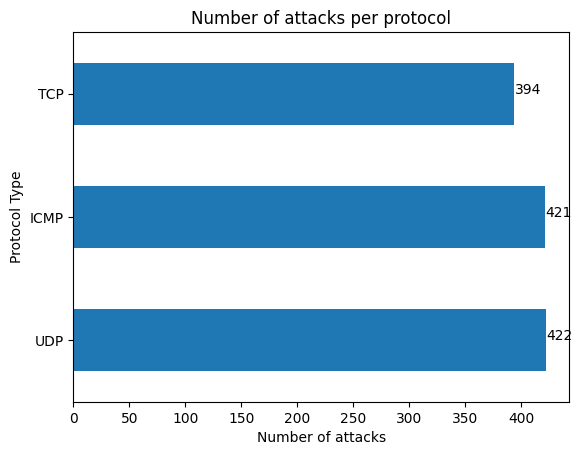

In [129]:
# Visualize the number of protocol types using a horizontal bar chart
data['Protocol'].value_counts().plot(kind='barh')
plt.xlabel('Number of attacks')
plt.ylabel('Protocol Type')
plt.title('Number of attacks per protocol')
for index, value in enumerate(data['Protocol'].value_counts()):
    plt.text(value+12, index, str(value), ha='center')
plt.show()

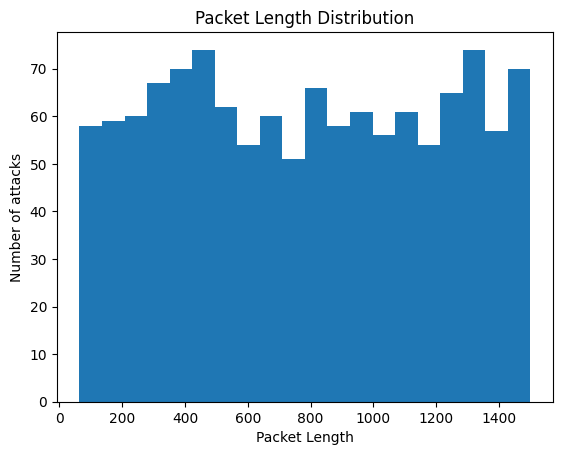

In [130]:
# Visualize the packet length distribution using a histogram
data['Packet Length'].plot(kind='hist', bins=20)
plt.xlabel('Packet Length')
plt.ylabel('Number of attacks')
plt.title('Packet Length Distribution')
plt.show()

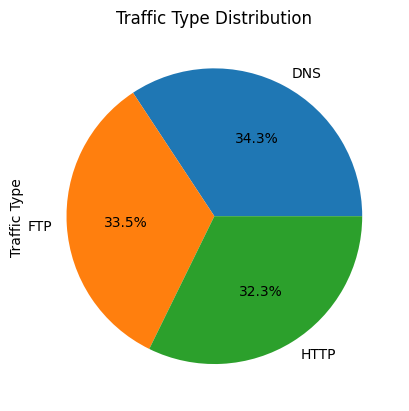

DNS     424
FTP     414
HTTP    399
Name: Traffic Type, dtype: int64


In [131]:
# Visualize the traffic type distribution using a pie chart
data['Traffic Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Traffic Type Distribution')
plt.show()
print(data['Traffic Type'].value_counts())

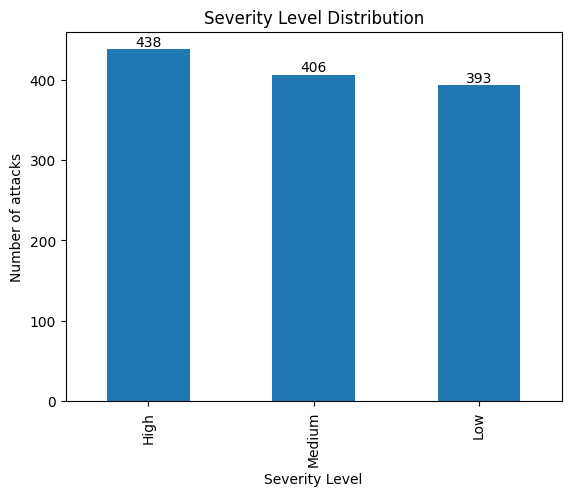

In [132]:
# Visualize the severity level of attacks using a bar chart
data['Severity Level'].value_counts().plot(kind='bar')
plt.xlabel('Severity Level')
plt.ylabel('Number of attacks')
plt.title('Severity Level Distribution')
for index, value in enumerate(data['Severity Level'].value_counts()):
    plt.text(index, value+4, str(value), ha='center')
plt.show()

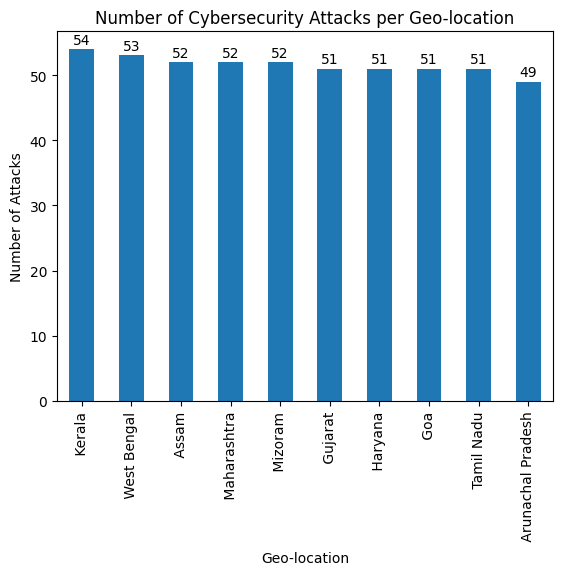

In [133]:
# Visualize the number of attacks per geo-location (state) using a bar chart
data['Geo-location Data'].str.split(',', expand=True)[1].value_counts().head(10).plot(kind='bar')
plt.title('Number of Cybersecurity Attacks per Geo-location')
plt.xlabel('Geo-location')
plt.ylabel('Number of Attacks')
for index, value in enumerate(data['Geo-location Data'].str.split(',', expand=True)[1].value_counts().head(10)):
    plt.text(index, value+0.8, str(value), ha='center')
plt.show()

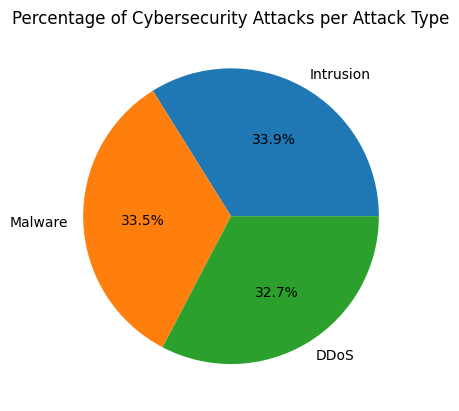

Intrusion    419
Malware      414
DDoS         404
Name: Attack Type, dtype: int64


In [134]:
# Visualize the percentage of attacks per attack type using a pie chart
data['Attack Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Cybersecurity Attacks per Attack Type')
plt.ylabel('')
plt.show()
print(data['Attack Type'].value_counts())

---
Display the frequency distribution of **continuous** attribute 'Timestamp' using histograms

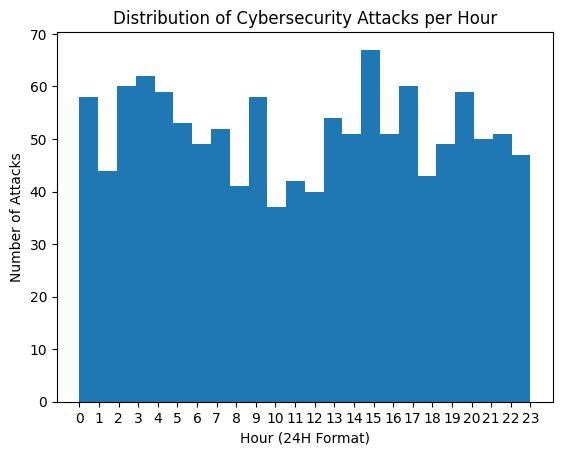

In [135]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Timestamp'].dt.hour.plot(kind='hist', bins=24)
plt.title('Distribution of Cybersecurity Attacks per Hour')
plt.xlabel('Hour (24H Format)')
plt.ylabel('Number of Attacks')
plt.xticks(np.arange(0, 24, 1))
plt.show()

---
<u>Frequency Distribution Table</u> of the 'Attack Types' **discrete** attribute


In [136]:
classes = data['Attack Type'].value_counts().index
values = data['Attack Type'].value_counts().values
freq = data['Attack Type'].value_counts()
rf = data['Attack Type'].value_counts(normalize=True)
cf = data['Attack Type'].value_counts(normalize=True).cumsum()
df = pd.DataFrame({'Frequency': freq, 'R.F': rf, 'C.F': cf})
print(df)

           Frequency       R.F       C.F
Intrusion        419  0.338723  0.338723
Malware          414  0.334681  0.673403
DDoS             404  0.326597  1.000000


---
<u>Frequency Distribution Table</u> of the 'Timestamp' **continous** attribute (by year)

In [137]:
classes = data['Timestamp'].dt.year.value_counts().index
values = data['Timestamp'].dt.year.value_counts().values
freq = data['Timestamp'].dt.year.value_counts()
rf = data['Timestamp'].dt.year.value_counts(normalize=True)
cf = data['Timestamp'].dt.year.value_counts(normalize=True).cumsum()
df = pd.DataFrame({'Frequency': freq, 'R.F': rf, 'C.F': cf})
print(df)

      Frequency       R.F       C.F
2022        346  0.279709  0.279709
2020        335  0.270816  0.550525
2021        294  0.237672  0.788197
2023        262  0.211803  1.000000


---
* **Research Questions**:

    1. What are the most prevalent attack types?

    2. Do the motivations behind cyberattacks differ depending on the type of location?
    
    3. Can machine learning models be developed to accurately identify and classify cyberattacks in real-time?